In [7]:
import maboss
from tqdm import tqdm
import os
import pandas as pd
import scanpy as sc

In [11]:
ensemble = maboss.Ensemble(path = '/home/spankaew/Git/BooleanBenchmark/models/Invasion')

In [19]:
model = maboss.('/home/spankaew/Git/BooleanBenchmark/models/Invasion/Invasion_0.bnet')

GF.istate = FALSE;
TGFbeta.istate = FALSE;
CDH1.istate = FALSE;
CDH2.istate = FALSE;
CTNNB1.istate = FALSE;
NICD.istate = FALSE;
p53.istate = FALSE;
miR34.istate = FALSE;
AKT1.istate = FALSE;
TWIST1.istate = FALSE;
miR203.istate = FALSE;
AKT2.istate = FALSE;
ZEB2.istate = FALSE;
p63.istate = FALSE;
p73.istate = FALSE;
miR200.istate = FALSE;
ERK.istate = FALSE;
Apoptosis.istate = FALSE;
SNAI1.istate = FALSE;
SNAI2.istate = FALSE;
ZEB1.istate = FALSE;
DKK1.istate = FALSE;
p21.istate = FALSE;
CellCycleArrest.istate = FALSE;
DNAdamage.istate = FALSE;
ECMicroenv.istate = FALSE;
EMT.istate = FALSE;
SMAD.istate = FALSE;
Invasion.istate = FALSE;
Migration.istate = FALSE;
Metastasis.istate = FALSE;
VIM.istate = FALSE;

time_tick = 0.5;
max_time = 1000.0;
sample_count = 10000.0;
discrete_time = 0.0;
use_physrandgen = 0.0;
seed_pseudorandom = 0.0;
display_traj = 0.0;
statdist_traj_count = 0.0;
statdist_cluster_threshold = 1.0;
thread_count = 1.0;
statdist_similarity_cache_max_size = 20000.0;



In [34]:
# Create blank file to get the results
ensemble_results = {}

path = '/home/spankaew/Git/BooleanBenchmark/models/Invasion/' 
model_list = os.listdir(path)

for model in tqdm(model_list):

    # Load model
    simulations = maboss.loadBNet(path + model)

    # Modify the parameter of the model
    simulations.update_parameters(sample_count = 10000,
                                  thread_count = 15,
                                  max_time = 50,
                                  time_tick = 1)
    simulations.network.set_output(simulations.network.names)

    # Perform simulations
    result = simulations.run()

    # Get matrix
    model_mtx = result.get_nodes_probtraj().copy()

    # Setup cell matrix
    ## Cells
    model_mtx['model_id'] = model.replace('.bnet','')
    ## Timepoint
    model_mtx['timepoint'] = model_mtx.index
    ## Change index
    model_mtx.index = model_mtx.index.map(str)
    model_mtx.index = model + '_' + model_mtx.index

    # Concatenate model results in dictionary
    ensemble_results[model] = model_mtx

100%|██████████| 1024/1024 [11:48<00:00,  1.45it/s]


In [42]:
import pandas as pd
simulation_df = pd.concat(ensemble_results.values(), ignore_index = True)
simulation_df.to_csv('/home/spankaew/Git/BooleanBenchmark/tmp/Invasion_simulation.csv')

In [41]:
cl_df = pd.read_csv('/home/spankaew/Git/BooleanBenchmark/tmp/Invasion_simulation.csv', index_col = 0)
cl_df.index = cl_df.model_id + '_' + [str(f) for f in cl_df.timepoint]
cl_df.index.name = None

In [42]:
adata = sc.AnnData(cl_df.drop(['model_id','timepoint'],axis = 1))
adata.obs['timepoint'] = cl_df['timepoint']
adata.obs['model_id'] = cl_df['model_id']

/tmp/ipykernel_133429/3239906449.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(cl_df.drop(['model_id','timepoint'],axis = 1))


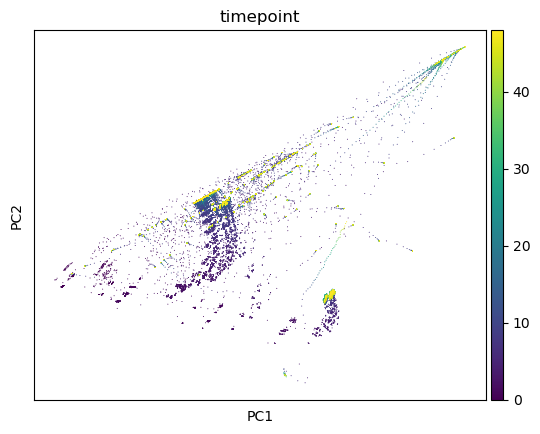

In [47]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color = 'timepoint', size = 2)

/home/spankaew/anaconda3/envs/scPROFILE_saran/lib/python3.9/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/spankaew/anaconda3/envs/scPROFILE_saran/lib/python3.9/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


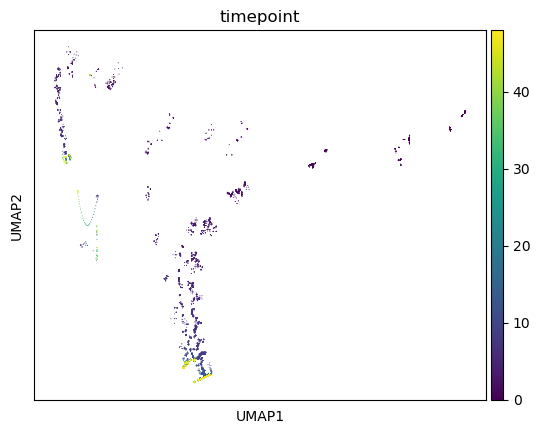

In [48]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(
    adata,
    color="timepoint",
    # Setting a smaller point size to get prevent overlap
    size=2,
)